# Homework 1

### Due by 11:59pm on 5 October ( submit within Portfolio )

For each instruction, show your code and execution within the Jupyter Notebook.

## 1. Description of the dataset
Give a brief description of your dataset. Data from reported fatal car accidents in 2013

Number of rows? 30358

Number of variables? 1,608,974

## 2. Loading and Cleaning
Load the your dataset into a pandas dataframe and have a look at the first 15 rows.

Create a column called "class" and randomly add a "1", "2", or "3" for every row.

e.g.

featueA | Class
--- | ---
9 | 1
5 | 2
7 | 3
6 | 2
3 | 1
6 | 3

Show names of all columns and rename columns as necesary

Show unique attributes for a given features that are stored in the dataset

e.g. featureA [1 2 3]

Create a crosstabulation or contingency table

Get rid of the junk numbering

Create a new dataframe dfsub by taking the list of one column (feature) and using pandas. Apply function to divide all values by 100.

## 2. Quick Intro to Matplotlib
Create a plot that shows two columns (features) plotted against each other (e.g. A vs. B)
Create a histogram of the dataset using a selected column (feature)

Use a more object oriented approach by using the subplots function to set both figure and axis.

Make scatterplots of a selected column "featureA" in the list yfeatureA against the featureA in the list xfeatureA. As the names suggest, plot featureA in yfeatureA along the y featureA and the acids in xfeatureA along the x axis. Label the axes with the respective feature name. Set it up as a grid with 3 rows and 2 columns.

The first concept we deal with here is pandas groupby. Group your dataframe dfsub by the values of a particular factor variable.

The groupby function also acts like an object that can be mapped. After the mapping is complete, the rows are put together (reduced) into a larger dataframe. Apply the describe function.

One may iterate through the groupby 'dictionary'is to get the pandas series from each sub-dataframe, and compute the standard deviation. Apply the std function

Pandas can do general merges. When we do that along an index, it's called a join. Apply to join to two selected columns.

Let's weight the a selected feature content by a random weight. Extract a subset of columns from df and then write a function to weigh the features content by this random weight, delivering a weighted feature mean in the final dataframe.


## 3. One Dimensional Exploratory Data Analysis (EDA) with Pandas

Create a dataframe with just one column or feature.

Make a bar plot of the relative mean percentages

The aforementioned graph get's proportions of all the a selected feature for a specific class. From this, we can ask the opposite question: What's the distribution classes within that column/feature?

Write code to scatterplot a column/reature against another features color coded by the classes in that feature.

Could a linear or nonlinear classifier separate the the classes (1 from 2 or 2 from 3 or 1 from 3)?

Write code to scatterplot a column/feature against a different set of features color coded by the classes in that feature. Select features that this has not been done for.

Apply a linear or nonlinear classifier to the scatter plot and color code the classes.

## 4. Miscellaneous Pandas Plotting tools: scatters, boxplots, and parallel co-ordinates

Write code that will allow you to plot marginals using rug plots and histograms of your dataset

Write code that will allow you to show the probability distributions of your dataset

Write code that will allow you to show parallel coordinates using your dataset

## 5. Portfolio: Pandas Data Manipulation and Plotting tools

Add examples of Pandas using data manipulation and plotting techniques against your dataset in the ToolKit section of your Portfolio. 

In [ ]:

#Give a brief description of your dataset. 
#Data from reported fatal car accidents in 2013
#Number of rows? 30358
#Number of variables? 360696

In [51]:
!pip install beautifulsoup4
!pip install seaborn 
!pip install pyquery
!pip install mrjob 
!pip install Pattern3
!pip install brewer2mpl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import jupyter
import scipy as sp
import sklearn
import requests
import networkx as nx
import bs4
import mrjob


In [2]:
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

C:\Users\m007b\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [4]:
#Load the your dataset into a pandas dataframe and have a look at the first 15 rows.
df=pd.read_csv("data/Fatal_Motor_Vehicle_Accidents.csv")
df.head(15)

,STATE,VE_TOTAL,PEDS,PERSONS,COUNTY,MONTH,DAY_WEEK,TWAY_ID,SCH_BUS,RAIL,FATALS,DRUNK_DR
0,1,1,0,8,115,1,1,I-59,0,0,2,0
1,1,2,0,2,55,1,5,US-SR 74,0,0,1,0
2,1,1,0,1,89,1,1,OAKWOOD AVE,0,0,1,0
3,1,1,0,3,73,1,1,JEFFERSON AVE SW,0,0,2,0
4,1,2,0,3,125,1,1,I-359,0,0,1,0
5,1,2,0,3,97,1,3,GOVERNMENT ST,0,0,1,0
6,1,1,0,1,95,1,6,SR-205,0,0,1,0
7,1,2,0,2,49,1,2,SR-75,0,0,1,0
8,1,1,0,1,17,1,7,CR-267,0,0,1,1
9,1,2,0,4,51,1,7,SR-14,0,0,1,0


In [5]:
#Create a column called "class" and randomly add a "1", "2", or "3" for every row.

df['randNumCol'] = np.random.randint(1, 4, df.shape[0])
df['randNumCol'].head(15)

0     3
1     3
2     3
3     1
4     3
5     2
6     2
7     2
8     2
9     1
10    1
11    1
12    2
13    1
14    2
Name: randNumCol, dtype: int32

In [6]:
df.rename(columns={df.columns[12]:'CLASS'}, inplace=True)
df.columns

Index(['STATE', 'VE_TOTAL', 'PEDS', 'PERSONS', 'COUNTY', 'MONTH', 'DAY_WEEK', 'TWAY_ID', 'SCH_BUS', 'RAIL', 'FATALS', 'DRUNK_DR', 'CLASS'], dtype='object')

In [7]:
#Show names of all columns and rename columns as necesary
print(df.columns)
print(df.index)

Index(['STATE', 'VE_TOTAL', 'PEDS', 'PERSONS', 'COUNTY', 'MONTH', 'DAY_WEEK', 'TWAY_ID', 'SCH_BUS', 'RAIL', 'FATALS', 'DRUNK_DR', 'CLASS'], dtype='object')
RangeIndex(start=0, stop=30057, step=1)


In [8]:
#Show unique attributes for a given features that are stored in the dataset
print ('STATE\t', df.STATE.unique())
print ('VE_TOTAL\t', df.VE_TOTAL.unique())
print ('PEDS\t', df.PEDS.unique())
print ('PERSONS\t', df.PERSONS.unique())
print ('COUNTY\t', df.COUNTY.unique())
print ('MONTH\t', df.MONTH.unique())
print ('DAY_WEEK\t', df.DAY_WEEK.unique())
print ('TWAY_ID\t', df.TWAY_ID.unique())
print ('SCH_BUS\t', df.SCH_BUS.unique())
print ('RAIL\t', df.RAIL.unique())
print ('FATALS\t', df.FATALS.unique())
print ('DRUNK_DR\t', df.DRUNK_DR.unique())
print ('CLASS\t', df.CLASS.unique())

STATE	 [ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 56 49 50 51 53 54
 55]
VE_TOTAL	 [ 1  2  3  4  5  6 17  7  8 12 22 11 15  9 90 14]
PEDS	 [0 1 2 3 9 4 5 7]
PERSONS	 [  8   2   1   3   4   7   9   5  15   6  11   0  13  12  20  10  22  17
  14  16  18  19  21  37  23  25  24 127  39  27  46  42]
COUNTY	 [115  55  89  73 125  97  95  49  17  51   1   9  43  19   7  81  21  69
 101  63 117  33  47 123 131  31  85  71  93 103   3  15 129  45  77  65
  79 109  99 105 121  91  23 113 119   5 133 111  87 127  29  37  27  83
  39  35  41  25  11  59  53  57  61  13  75 107  20 290 170  90 122 270
 201 261  70 240 188 150  68  50  12 999 143 141 145  67 135 149 147 139
 137  14   0  86 209 199 213 295 165 175 217 321 215 245 151 211 313 233
 153 207 297 303 271 283 299 285 243 257 189 191 241 247 275 277 269 185
 253 273 237 225 195 157 311 219 305 223 227 177 183 251 231 281 187 263
 179 161 301 255 229

In [9]:
#Create a crosstabulation or contingency table
pd.crosstab(df.STATE, df.COUNTY)

COUNTY,0,1,3,5,6,7,9,11,12,13,14,15,17,19,20,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,50,51,53,55,57,59,61,63,65,67,68,69,70,71,73,75,77,78,79,81,...,465,467,469,471,473,475,477,479,481,483,485,487,489,491,493,495,497,499,501,503,505,507,510,520,540,550,580,590,595,600,630,650,660,670,678,680,690,700,710,720,730,740,760,770,775,790,800,810,820,999
STATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,10,37,5,0,5,11,5,0,3,0,9,9,11,0,15,6,6,3,4,4,9,6,2,3,4,14,8,8,15,0,15,9,13,3,3,2,8,6,0,0,13,0,10,80,3,11,0,7,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,24,16,38,0,23,2,4,11,375,0,46,34,90,0,54,7,34,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5,0,2,3,4,0,17,4,4,0,2,0,8,0,5,0,0,5,3,5,7,12,5,11,2,1,2,4,14,3,4,0,20,5,6,6,13,1,4,2,4,0,10,0,3,2,4,2,0,2,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,78,1,5,0,19,7,8,0,45,0,10,24,94,0,4,27,26,3,121,14,18,7,546,19,14,3,13,44,3,0,1,32,15,13,162,18,3,209,114,0,7,0,232,189,32,73,0,26,42,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,32,2,21,0,2,2,2,0,12,4,1,2,8,0,1,0,1,0,9,37,2,12,4,3,55,7,5,1,1,0,3,0,1,0,36,1,5,0,10,0,18,0,6,5,6,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,51,69,16,0,14,51,27,0,15,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,13,48,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Get rid of the junk numbering
-NA

In [36]:
#Create a new dataframe dfsub by taking the list of one column (feature) and using pandas. 
#Apply function to divide all values by 100

dfsub=df.iloc[:,10:11].apply(lambda x: x/100.0)
dfsub.head()

#This doesnt apply well to my data set as there are no columbs which we need to be percentages

,FATALS
0,0.02
1,0.01
2,0.01
3,0.02
4,0.01


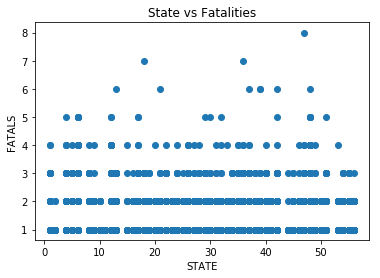

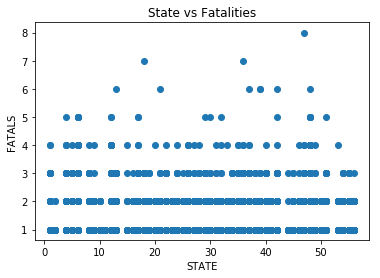

In [38]:
#Create a plot that shows two columns (features) plotted against each other (e.g. A vs. B)
#Create a histogram of the dataset using a selected column (feature)

fig=plt.figure()
plt.scatter(df.STATE, df.FATALS)
axis = fig.gca() 
axis.set_title('State vs Fatalities')
axis.set_xlabel('STATE')
axis.set_ylabel('FATALS')
fig


In [10]:
#Use a more object oriented approach by using the subplots function to set both figure and axis.
figure()
fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(df.STATE, df.FATALS)
axes[0][1].plot(df.STATE, df.FATALS, '.')
axes[1][0].scatter(df.STATE, df.FATALS)
axes[1][1].hist(df.STATE)
fig.tight_layout()
show(fig)

NameError: name 'figure' is not defined

In [ ]:
#Make scatterplots of a selected column "featureA" in the list yfeatureA against the featureA in the list xfeatureA. 
#As the names suggest, plot featureA in yfeatureA along the y featureA and the acids in xfeatureA along the x axis. 
#Label the axes with the respective feature name. Set it up as a grid with 3 rows and 2 columns.


In [ ]:
#The first concept we deal with here is pandas groupby. Group your dataframe dfsub by the values of a particular factor variable.


In [ ]:
#The groupby function also acts like an object that can be mapped. 
#After the mapping is complete, the rows are put together (reduced) into a larger dataframe. Apply the describe function.


In [ ]:
#One may iterate through the groupby 'dictionary'is to get the pandas series from each sub-dataframe, 
#and compute the standard deviation. 
#Apply the std function


In [ ]:
#Pandas can do general merges. When we do that along an index, it's called a join. Apply to join to two selected columns.


In [ ]:
#Let's weight the a selected feature content by a random weight. 
#Extract a subset of columns from df and then write a function to weigh the features content by this random weight, 
#delivering a weighted feature mean in the final dataframe.

In [ ]:
#Create a dataframe with just one column or feature.


In [ ]:
#Make a bar plot of the relative mean percentages
.

In [ ]:
#The aforementioned graph get's proportions of all the a selected feature for a specific class. 
#From this, we can ask the opposite question: What's the distribution classes within that column/feature?


In [ ]:
#Write code to scatterplot a column/reature against another features color coded by the classes in that feature.
#Could a linear or nonlinear classifier separate the the classes (1 from 2 or 2 from 3 or 1 from 3)?


In [ ]:
#Write code to scatterplot a column/feature against a different set of features color coded by the classes in that feature. 
#Select features that this has not been done for.


In [ ]:
#Apply a linear or nonlinear classifier to the scatter plot and color code the classes

In [ ]:
#Write code that will allow you to plot marginals using rug plots and histograms of your dataset


In [ ]:
#Write code that will allow you to show the probability distributions of your dataset


In [ ]:
#Write code that will allow you to show parallel coordinates using your datase

---
*css tweaks in this cell*
<style>
div.text_cell_render {
    line-height: 150%;
    font-size: 110%;
    width: 800px;
    margin-left:50px;
    margin-right:auto;
    }
</style>